# seaborn (Letter Value plot or lvplot/boxenplot)

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

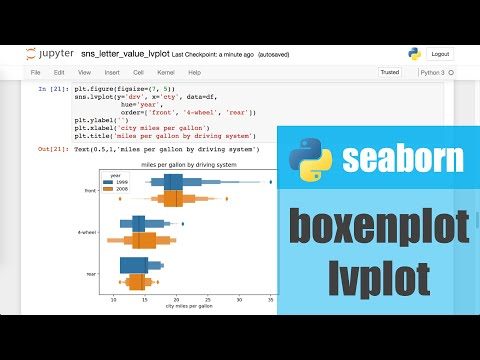

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xnmw4qISKjM', width=720, height=405)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
print(f"pandas  version = {pd.__version__}")
print(f"seaborn version = {sns.__version__}")

pandas  version = 0.25.3
seaborn version = 0.9.0


## read miles per gallon dataset (mpg.csv)

In [4]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
df=pd.read_csv(url)
df.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
147,nissan,maxima,3.0,1999,6,auto(l4),f,18,26,r,midsize
169,subaru,impreza awd,2.5,2008,4,auto(s4),4,20,25,p,compact
191,toyota,camry solara,3.0,1999,6,manual(m5),f,18,26,r,compact
110,hyundai,sonata,2.4,2008,4,auto(l4),f,21,30,r,midsize
134,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv


In [5]:
df['gear']=df.trans.str[0].map({'a':'auto', 'm':'manual'}).astype("category")
df['drv']=df.drv.map({'f':'front', 'r':'rear', '4':'4-wheel'}).astype('category')
df.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,gear
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4-wheel,9,12,e,pickup,auto
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4-wheel,9,12,e,suv,auto
151,nissan,pathfinder 4wd,3.3,1999,6,manual(m5),4-wheel,15,17,r,suv,manual
230,volkswagen,passat,2.0,2008,4,manual(m6),front,21,29,p,midsize,manual
219,volkswagen,jetta,2.8,1999,6,auto(l4),front,16,23,r,compact,auto


## wide format data

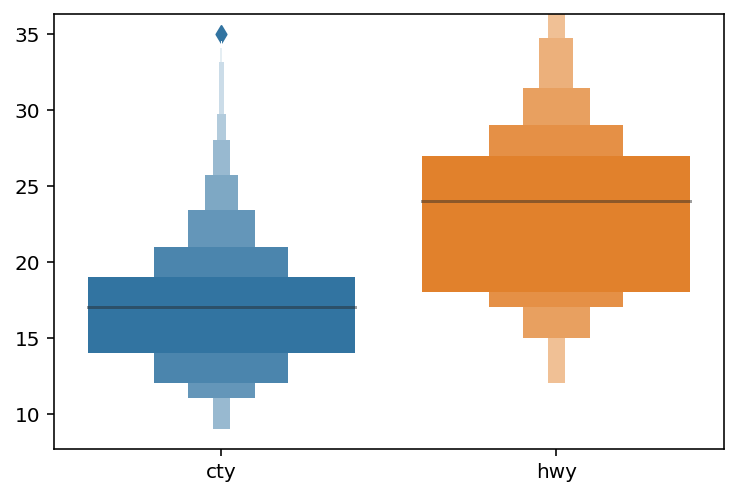

In [6]:
# sns.lvplot(data=df[['cty', 'hwy']])
sns.boxenplot(data=df[['cty', 'hwy']])

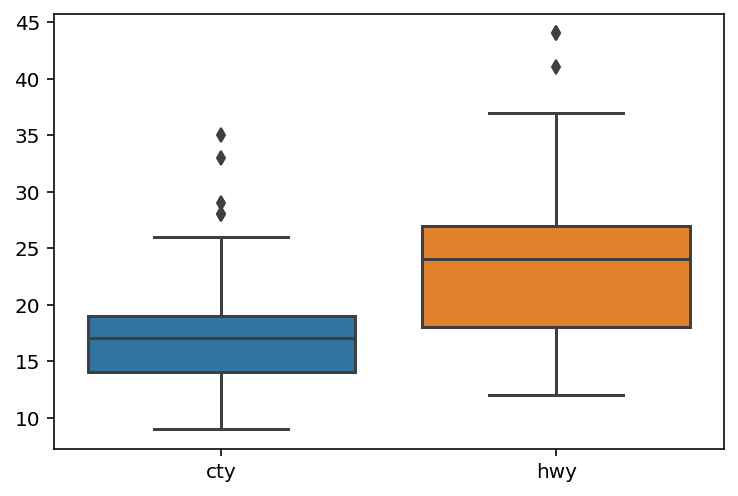

In [7]:
sns.boxplot(data=df[['cty', 'hwy']])

(2,)


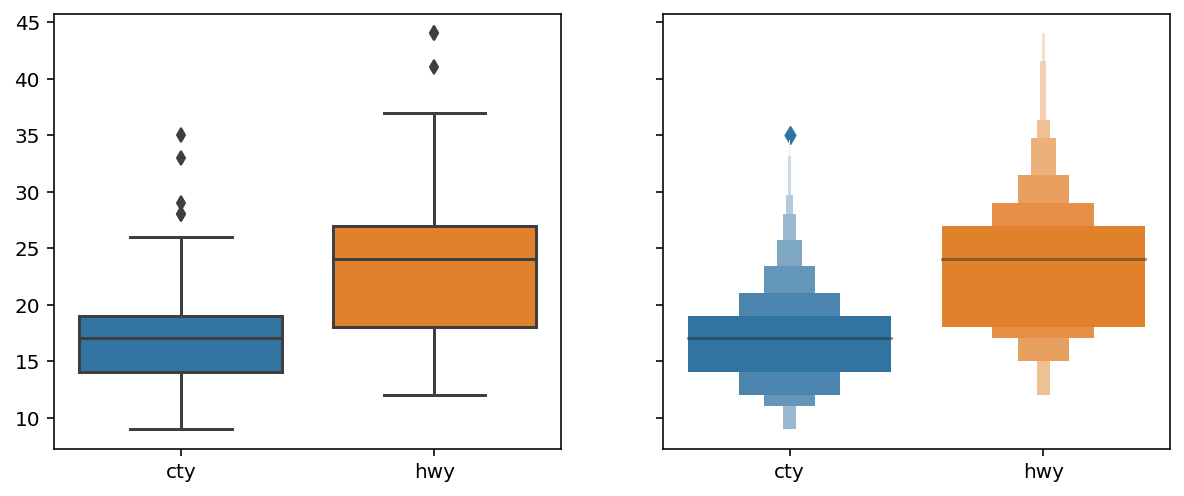

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharey=True, sharex=True)
print(ax.shape)
sns.boxplot(data=df[['cty', 'hwy']], ax=ax[0])
sns.boxenplot(data=df[['cty', 'hwy']], ax=ax[1])

## long format data (pass x and y)

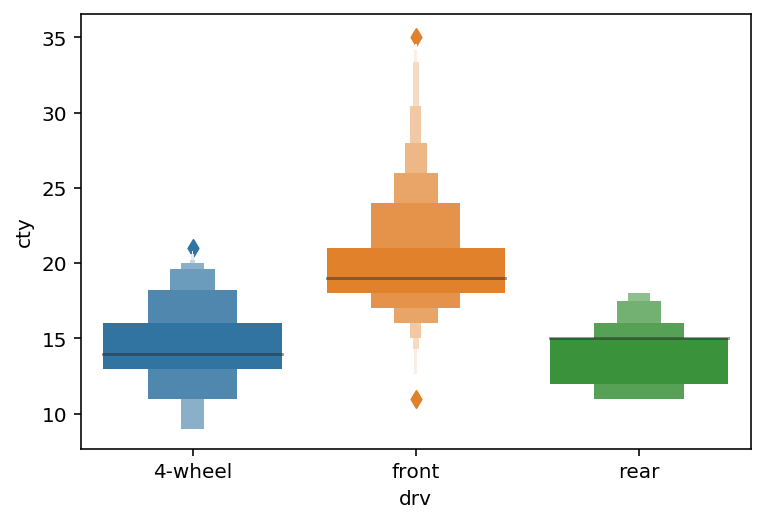

In [9]:
sns.boxenplot(x='drv', y='cty', data=df)

## compare to boxplot and violin

(3,)


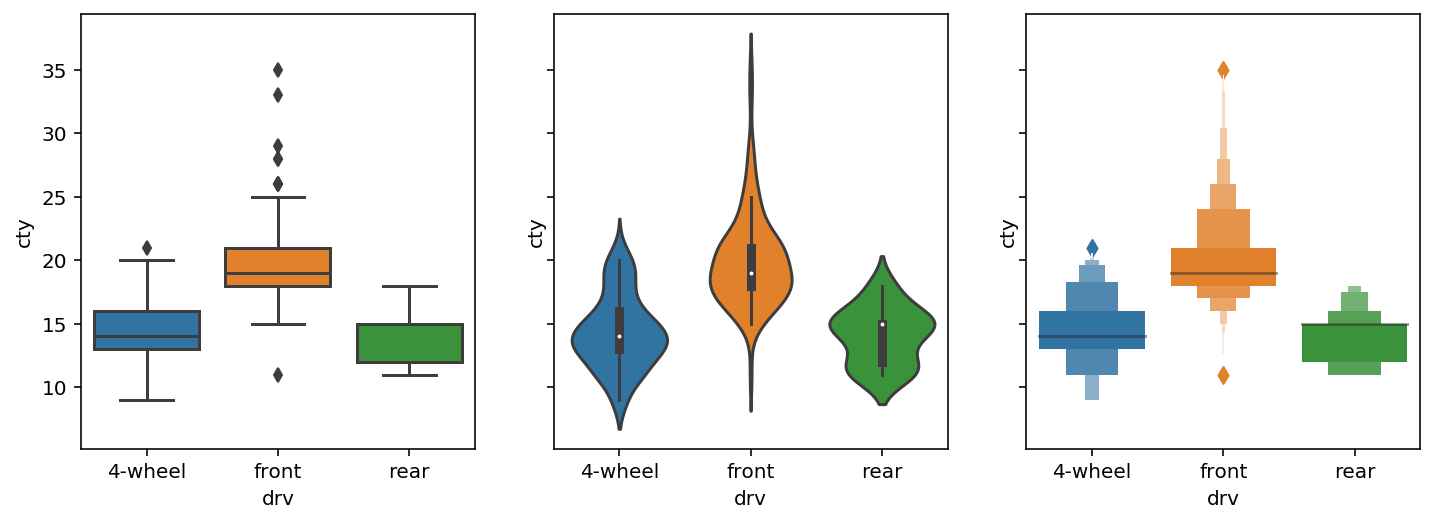

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(12,4), sharey=True, sharex=True)
print(ax.shape)
x_col='drv'
y_col='cty'
sns.boxplot(x=x_col, y=y_col, data=df, ax=ax[0])
sns.violinplot(x=x_col, y=y_col, data=df, ax=ax[1])
sns.boxenplot(x=x_col, y=y_col, data=df, ax=ax[2])

(3,)


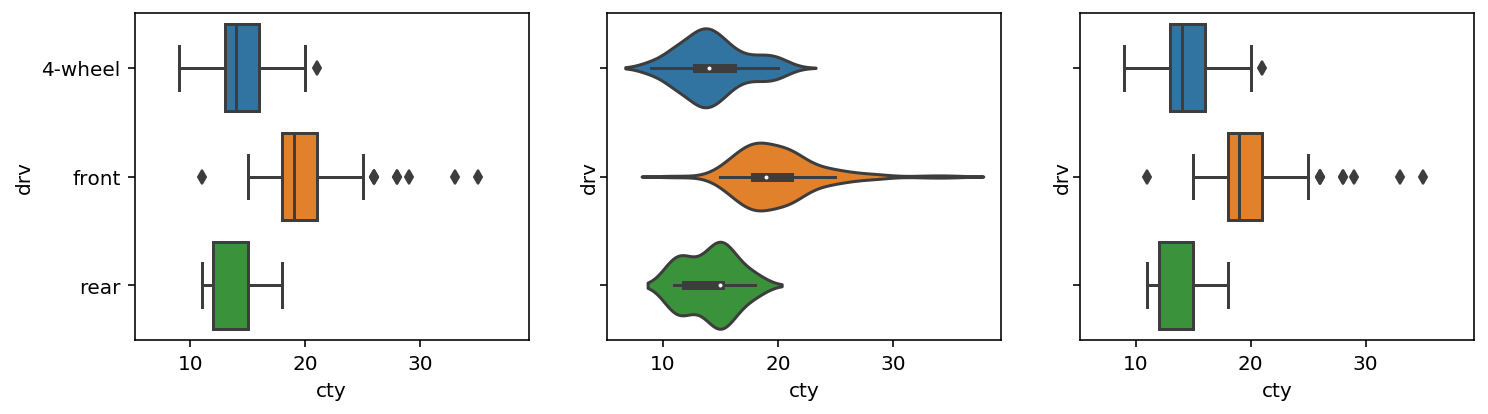

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True, sharex=True)
print(ax.shape)
x_col='cty'
y_col='drv'
sns.boxplot(x=x_col, y=y_col, data=df, ax=ax[0])
sns.violinplot(x=x_col, y=y_col, data=df, ax=ax[1])
sns.boxplot(x=x_col, y=y_col, data=df, ax=ax[2])

### add hue, custom order and label, title

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0.5, 1.0, 'miles per gallon by driving system')

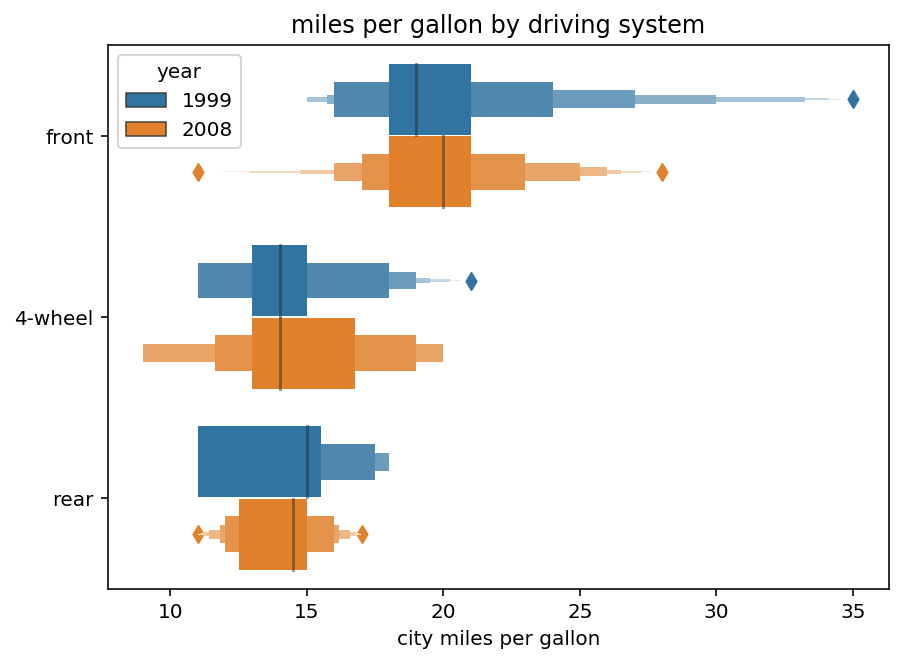

In [12]:
plt.figure(figsize=(7, 5))
sns.boxenplot(y='drv', x='cty', data=df,
            hue='year',
            order=['front', '4-wheel', 'rear'])
plt.ylabel('')
plt.xlabel('city miles per gallon')
plt.title('miles per gallon by driving system')

### palette

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0.5, 1.0, 'miles per gallon by driving system')

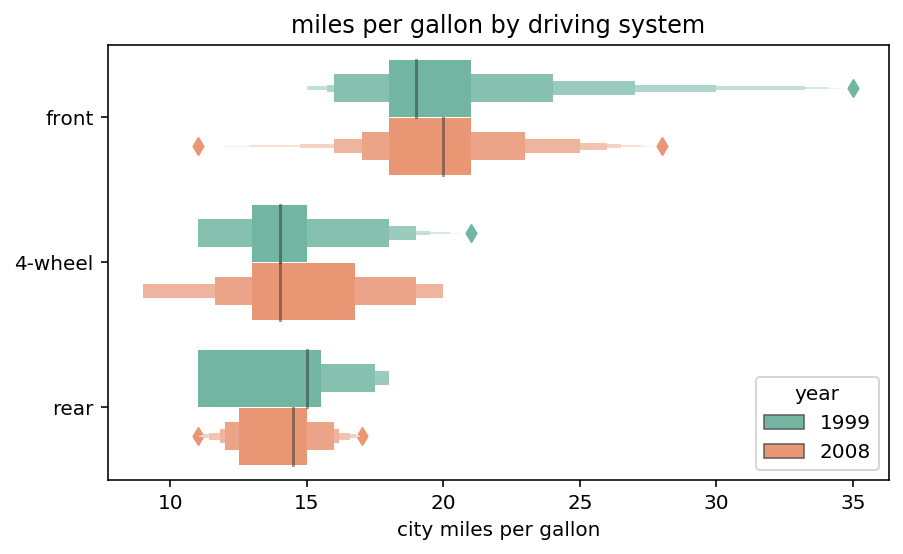

In [13]:
plt.figure(figsize=(7, 4))
sns.boxenplot(y='drv', x='cty', data=df,
            hue='year',
            palette="Set2",
            order=['front', '4-wheel', 'rear'])
plt.ylabel('')
plt.xlabel('city miles per gallon')
plt.title('miles per gallon by driving system')

## factorplot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

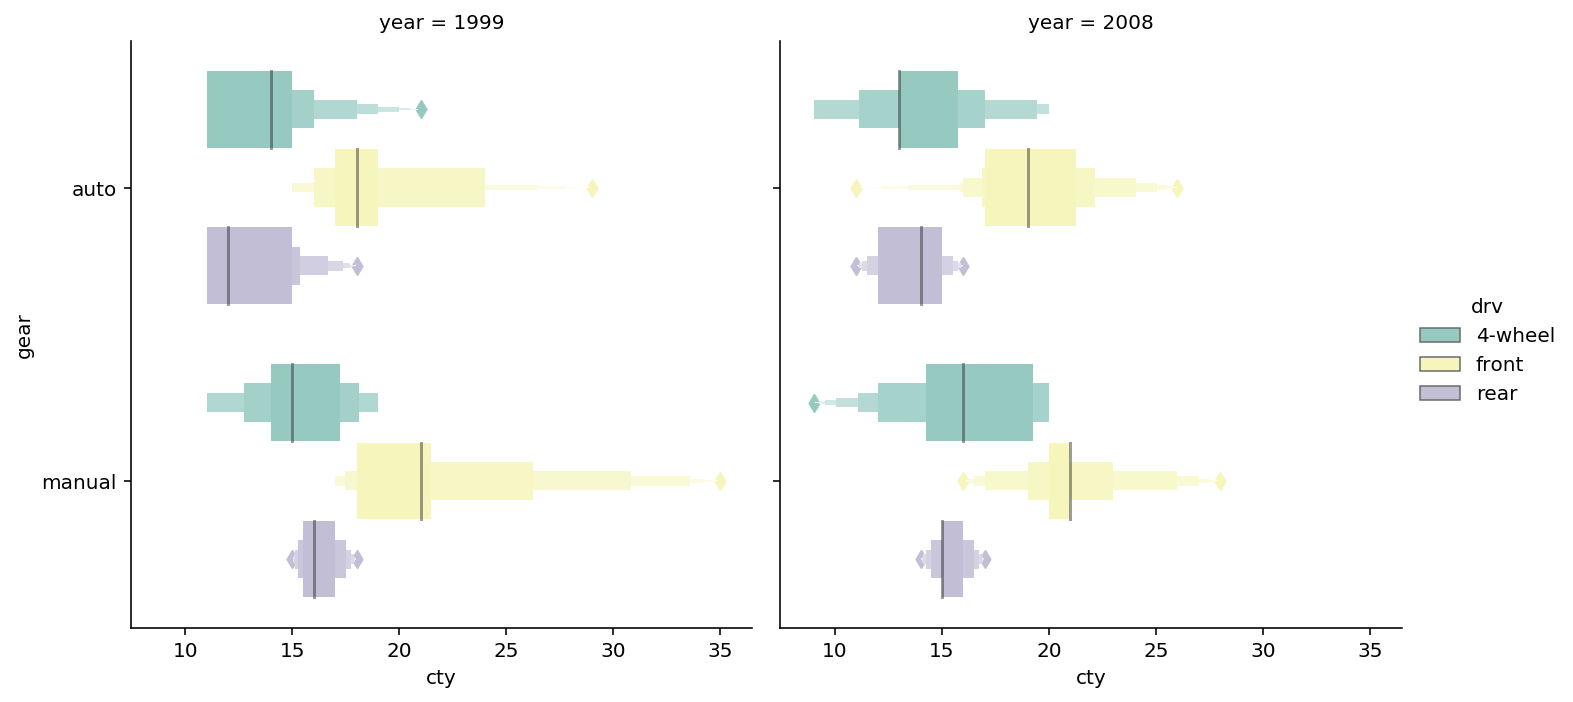

In [14]:
sns.catplot(y='gear', x='cty', data=df,
               hue='drv',
               kind='boxen',
               col='year',
               palette='Set3')

In [15]:
df['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [16]:
dg=df[df['class'].str.match('^(suv|compact|pickup)')]
dg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,gear
188,toyota,camry solara,2.4,2008,4,manual(m5),front,21,31,r,compact,manual
153,nissan,pathfinder 4wd,5.6,2008,8,auto(s5),4-wheel,12,18,p,suv,auto
87,ford,f150 pickup 4wd,4.6,2008,8,auto(l4),4-wheel,13,17,r,pickup,auto
84,ford,f150 pickup 4wd,4.2,1999,6,manual(m5),4-wheel,14,17,r,pickup,manual
68,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4-wheel,12,16,r,pickup,manual


/Users/prasert/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/prasert/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y

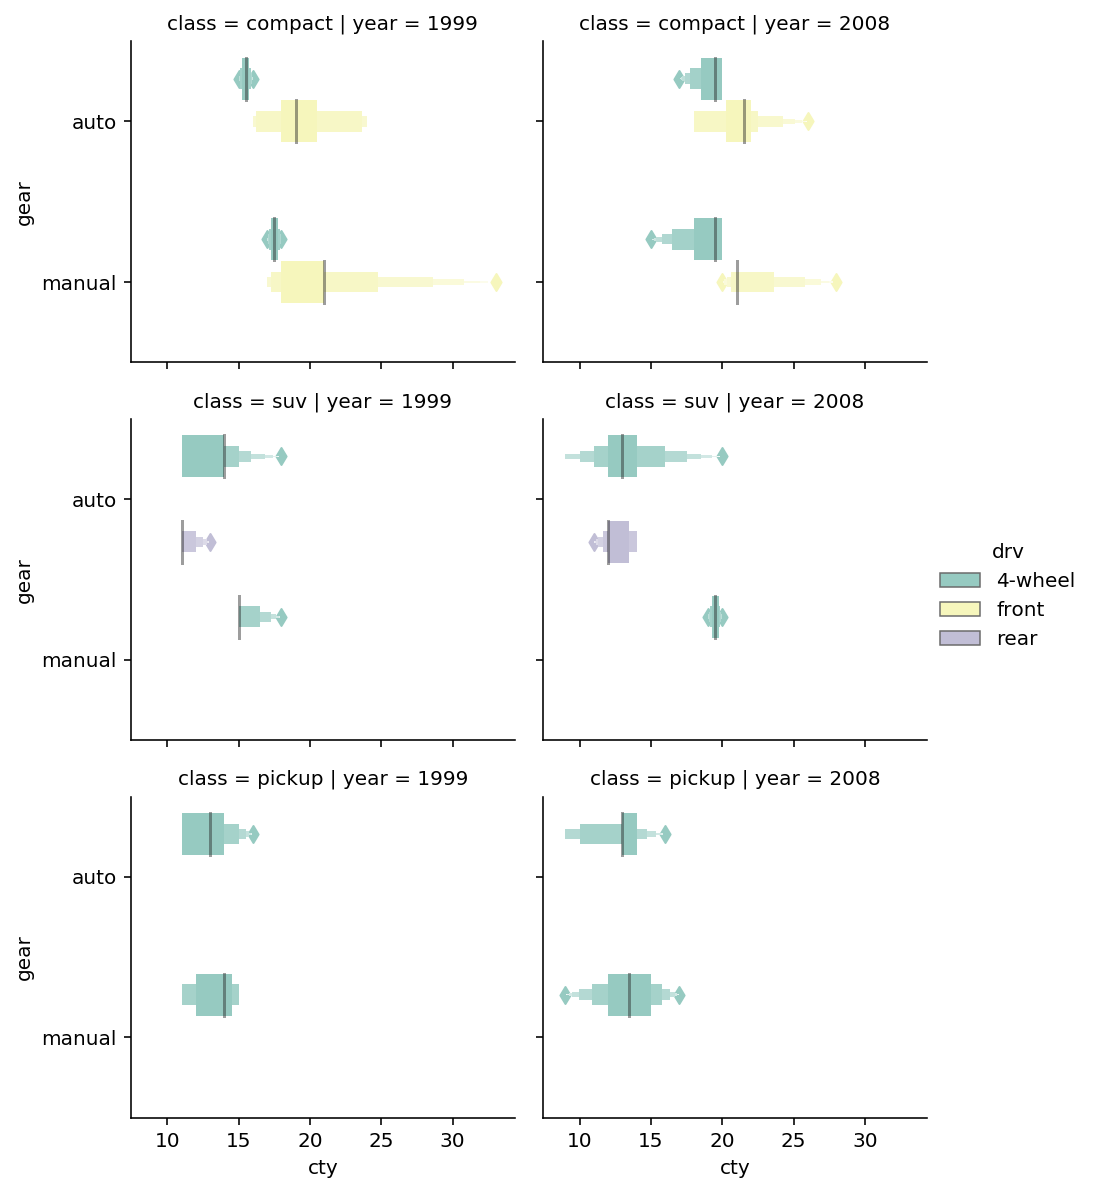

In [17]:
sns.factorplot(y='gear', x='cty', data=dg,
               hue='drv',
               kind='boxen',
               col='year',
               row='class',
               palette='Set3',
               size=2.8, aspect=1.2)